In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_data.csv to train_data.csv
User uploaded file "train_data.csv" with length 1986439 bytes


In [ ]:
df = pd.read_csv('train_data.csv')
df.head(2)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games


Опишем столбцы, которые присутствуют в датасете:

*   ID - Идентификатор настольной игры
*   Name - Имя
*   Year Published - Год публикации
*   Min Players - Рекомендуемое минимальное количество игроков
*   Max Players - Рекомендуемое максимальное количество игроков
*   Play Time - Время игры
*   Min Age - Рекомендуемый минимальный возраст игроков
*   Users Rated - Количество пользователей, оценивших игру
*   Rating Average - Средний рейтинг, полученный игрой (целевая переменная)
*   BGG Rank - Рейтинг от BGG
*   Complexity Average - Среднее значение сложности игры
*   Owned Users - Количество зарегистрированных BGG владельцев игры
*   Mechanics - Механика, используемая в игре
*   Domains - Домены настольных игр, которым принадлежит игра

Для начала преобразуем данные столбцов `Rating Average` и `Сomplexity Average` из строковых значений в числовые для удобства дальнейшего анализа



In [ ]:
df['Rating Average'] = df['Rating Average'].str.replace(',', '.').astype(float)
df['Complexity Average'] = df['Complexity Average'].str.replace(',', '.').astype(float)

Удалим дубликаты по столбцу `Name`


In [ ]:
df.drop_duplicates(subset=['Name'])

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
2,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
3,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
4,291457.0,Gloomhaven: Jaws of the Lion,2020.0,1,4,120,14,8392,8.87,6,3.55,21609.0,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15251,2921.0,The Game of Life,1960.0,2,6,60,8,10658,4.30,20338,1.18,16692.0,"Roll / Spin and Move, Simulation",Family Games
15252,1410.0,Trouble,1965.0,2,4,45,4,3255,3.79,20339,1.05,4962.0,Roll / Spin and Move,Children's Games
15254,5048.0,Candy Land,1949.0,2,4,30,3,4006,3.18,20342,1.08,5788.0,Roll / Spin and Move,Children's Games
15255,5432.0,Chutes and Ladders,-200.0,2,6,30,3,3783,2.86,20343,1.02,4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


In [ ]:
df.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,15247.000000,15256.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000,15240.000000
mean,108221.590214,1984.144140,2.021236,5.642918,92.801337,9.581766,819.530773,6.399775,10186.327784,1.991064,1372.209843
std,98862.566448,211.725679,0.696323,12.551944,607.611378,3.671560,3286.396397,0.936488,5863.744570,0.848816,4681.296849
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,10907.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5103.000000,1.330000,146.000000
50%,88316.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,119.000000,6.430000,10171.000000,2.000000,308.000000
75%,193045.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,379.000000,7.020000,15280.000000,2.540000,856.250000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


Удалим те столбцы, которые мы не будем использовать в анализе.

In [ ]:
df = df.drop(columns=['ID', 'Name', 'Mechanics', 'BGG Rank', 'Owned Users'])

Начнем с очистки данных:

1.   Заметим, что минимальное значение столбца 'Year Published' равно -3500. Во-первых, удалим те игры, год создания которых меньше 0. Пропущенные значения заменим медианой;
2.   Некорректные и пропущенные значения столбцов 'Min Players' и 'Max Players' на 1 и 100 соответственно;
3. Некорректные и пропущенные значения столбца 'Play Time' заменим на медиану столбца. Также удалим игры, длительность которых меньше 1 минуты и больше 1000 минут;
4. Будем рассматривать игры, минимальный возраст для которых 10 лет;
5. Некорректные и пропущенные значения столбцов 'Rating Average' и 'Complexity Average' заменим на медианы данных столбцов.



In [ ]:
df = df[df['Year Published'] > 0]
df['Year Published'] = df['Year Published'].fillna(df['Year Published'].median())

df['Min Players'] = df['Min Players'].apply(lambda x: x if x > 0 else df['Min Players'].median())
df['Max Players'] = df['Max Players'].apply(lambda x: x if x > 0 and x < 100 else df['Max Players'].median())

df['Play Time'] = df['Play Time'].apply(lambda x: x if (x > 0 and x <= 1000) else None)
df['Min Age'] = df['Min Age'].apply(lambda x: x if x > 9  else None)
df = df.dropna(subset=['Play Time', 'Min Age'])

df['Rating Average'] = df['Rating Average'].apply(lambda x: x if x > 0 else df['Rating Average'].median())
df['Complexity Average'] = df['Complexity Average'].apply(lambda x: x if x > 0 else df['Complexity Average'].median())

df.describe()

,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,Complexity Average
count,8838.000000,8838.000000,8838.000000,8838.000000,8838.000000,8838.000000,8838.000000,8838.000000
mean,2006.125933,2.026363,5.329939,93.236479,11.939919,1003.868522,6.598049,2.308236
std,22.719247,0.738907,8.184930,94.857997,1.753159,3638.462412,0.889236,0.761265
min,550.000000,1.000000,1.000000,1.000000,10.000000,30.000000,1.050000,1.000000
25%,2000.000000,2.000000,3.000000,40.000000,10.000000,64.000000,6.050000,1.780000
50%,2011.000000,2.000000,4.000000,60.000000,12.000000,149.500000,6.630000,2.250000
75%,2016.000000,2.000000,6.000000,120.000000,13.000000,511.000000,7.190000,2.800000
max,2022.000000,10.000000,99.000000,1000.000000,25.000000,84371.000000,9.460000,5.000000


Проверим на нормальное распределение три показателя: 'Rating Average', 'Complexity Average' и 'Play Time'. Медиана (50% квантиль) и среднее для первых двух параметров достаточно близки друг к другу, поэтому их мы проверим на нормальность. Однако, медиана и среднее для 'Play Time' не совпадают достаточно заметно. Это может быть связано с тем, что среди данных присутствуют несколько игр с очень длительным временем, и они сильно "вытягивают" среднее вверх. Это требует отдельного исследования.

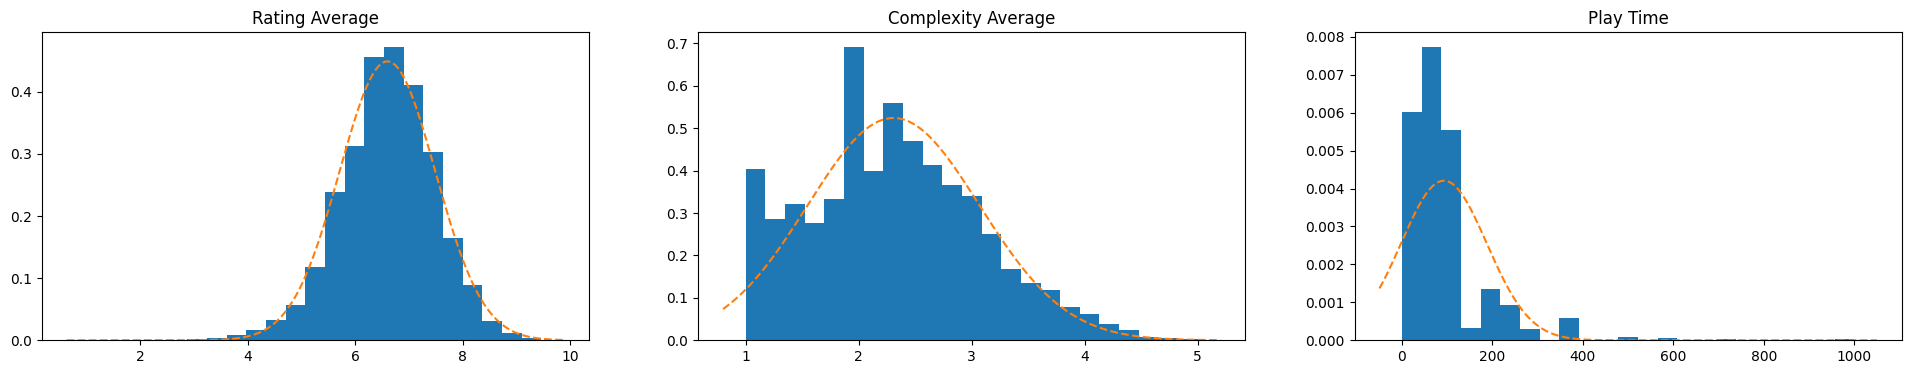

In [ ]:
keys = ['Rating Average', 'Complexity Average', 'Play Time']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)

    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Как и предполагалось, рейтинг игры распределен нормально, а время игры - нет. Анализируя гистограммы, можно заметить, что преобладают игры с более высоким рейтингом, небольшой сложностью и временем игры <200 минут. Однако, окончательный ответ насчет распределения сложности игры дать пока что сложно. Проведем дальнейший анализ.

Построим Q-Q кривую. Чем ближке график к графику y = x, тем более нормальным является распределение значений выборки.

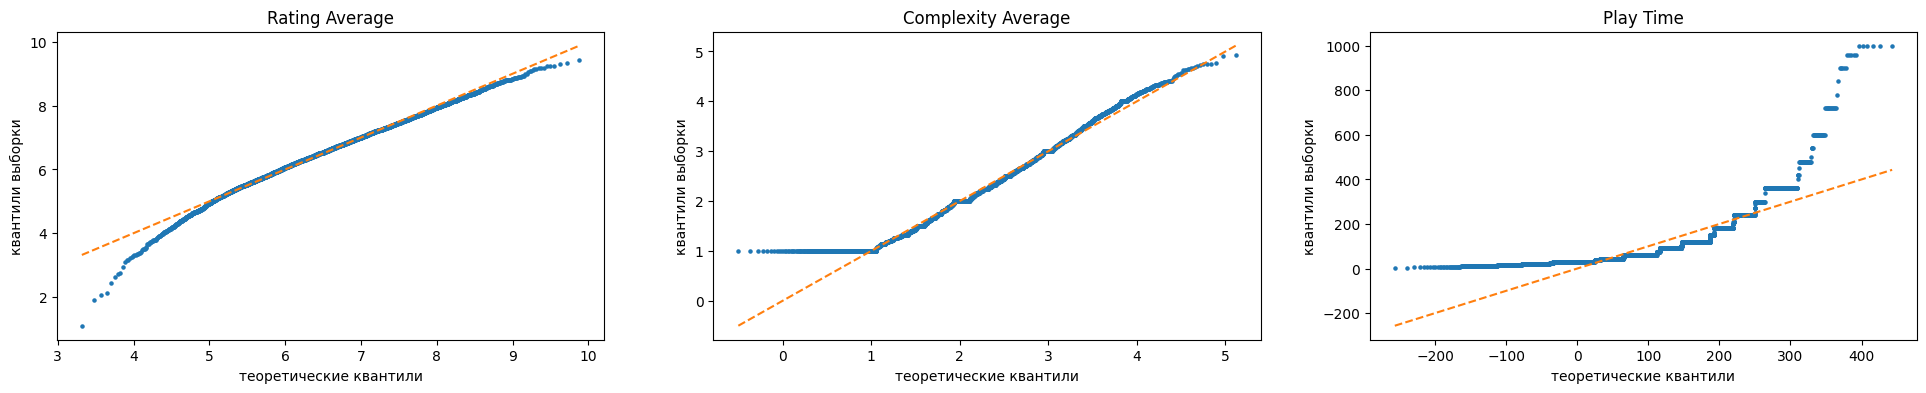

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Оценим нормальность выборок также на основании известных характеристик нормального распределения. Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

In [ ]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

Rating Average
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.703326544467074
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9529305272686128
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.993663724824621

Complexity Average
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6613487214301879
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9676397374971714
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9980764878931885

Play Time
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9081240099570038
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9512333107037791
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9887983706720977



Таким образом, можно сделать окончательный вывод о нормальном распределении параметров 'Rating Average' и 'Complexity Average'.

Вычислим и визуализируем корреляционную матрицу, чтобы определить связь между различными параметрами настольных игр.

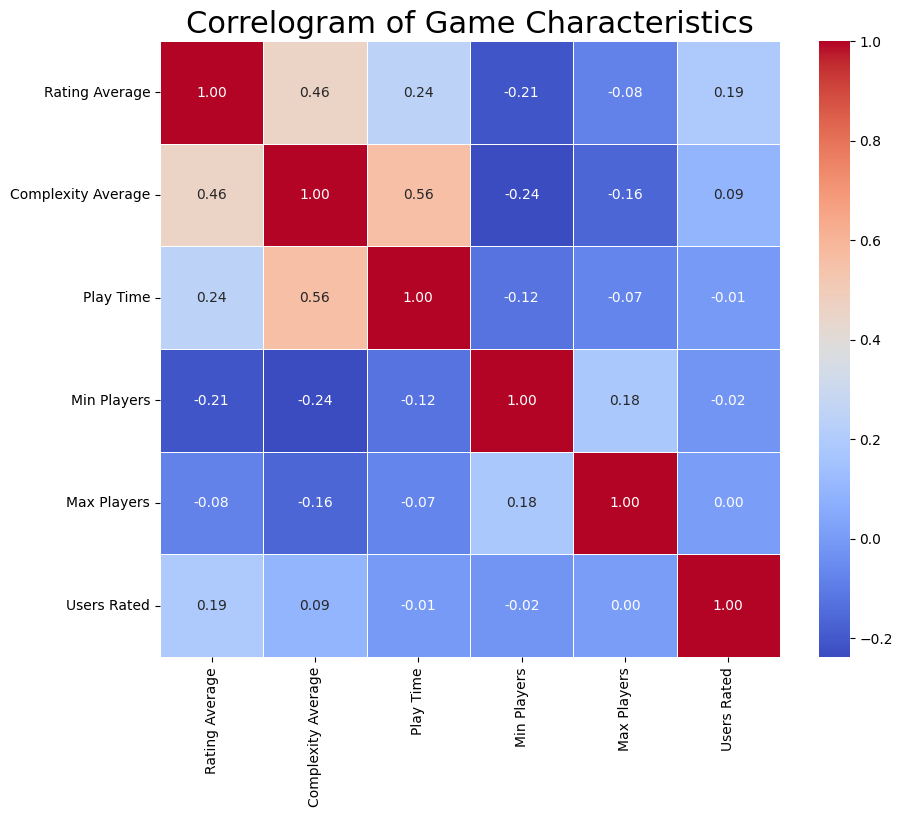

In [ ]:
plt.figure(figsize=(10,8))
corr_m = df[['Rating Average', 'Complexity Average', 'Play Time', 'Min Players', 'Max Players', 'Users Rated']].corr()
sns.heatmap(corr_m, xticklabels=corr_m.columns, yticklabels=corr_m.columns, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlogram of Game Characteristics', fontsize=22)
plt.show()

Наиболее сильная связь наблюдается между рейтингом и сложностью игры, а также временем игры и ее сложностью, поэтому она не нуждается в дополнительной проверке. Меньше связаны между собой число пользователей, оценивших игру, и рейтинг игры, что достаточно логично: время игры - лишь один из показателей, по которому пользователи могут оценивать игру и, скорее всего, не основной. В это же время наблюдается нелинейность между рейтингом игры и количеством игроков. Проведем дополнительный анализ полученных связей.

Будем проверять некоторые гипотезы относительно связи между разными параметрами настольных игр. Для проверки поставленных гипотез мы будем использовать дисперсионный анализ (ANOVA) для двух выборок, что позволяет проверить гипотезу о равенстве средних значений некоторой переменной между двумя группами данных.

In [ ]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

Для начала попробуем проверить верность утверждения о том, что более сложные игры оценивают большее количество пользователей ('Users Rated'). В качестве нулевой гипотезы возьмем утверждение о том, что среднее количество пользователей, оценивших сложные игры, не больше, чем у простых игр; в качестве альтернативной - сложные игры имеют большее количество пользователей, оценивших игру.
Разделим игры на "простые" и "сложные" по медиане Complexity Average, а затем применим дисперсионный анализ.


In [ ]:
median_complexity = df['Complexity Average'].median()
simple_games = df[df['Complexity Average'] < median_complexity]
complex_games = df[df['Complexity Average'] >= median_complexity]

In [ ]:
var_analise(df, simple_games, complex_games, 'Users Rated')

True

In [ ]:
mean_simple_rated = simple_games['Users Rated'].mean()
mean_complex_rated = complex_games['Users Rated'].mean()

print(f"Simple games: {mean_simple_rated:.2f}")
print(f"Complex games: {mean_complex_rated:.2f}")

Simple games: 742.06
Complex games: 1246.50


Так как F > t, то можно точно сказать, что количество оценивших пользователей действительно зависит от сложности игры. Более сложные игры оцениваются чаще, чем простые.

Верно ли, что чем больше игроков, тем лучше рейтинг игры? Нулевая гипотеза: между числом игроков и рейтингом игры нет значимой корреляции. Альтернативная гипотеза: существует положительная корреляция между числом игроков и рейтингом игры (чем больше игроков, тем выше рейтинг). Для этого воспользуемся коэффицентом корреляции Пирсона, который измеряет степень линейной зависимости между двумя переменными. После этого мы проверим статистическую значимость этой корреляции.

In [ ]:
df['Average Players'] = (df['Min Players'] + df['Max Players']) / 2

corr, p_value = stats.pearsonr(df['Average Players'], df['Rating Average'])
print(f"Коэффициент корреляции Пирсона: {corr:.3f}")

alpha = 0.05
if p_value < alpha:
    print("True")
else:
    print("False")

Коэффициент корреляции Пирсона: -0.100
True


Мы получили, что, хотя корреляция слабая (-0.1), она статистически значима, что означает, что существует небольшая обратная зависимость между переменными. Таким образом, мы можем отвергнуть нулевую гипотезу и заключить, что между переменными действительно существует слабая связь, но обратная: чем больше игроков, тем меньше будет рейтинг игры.

В заключении проведем анализ рейтинга, сложности и времени игр зависимости от их жанра. Для этого разобъем нашу таблицу на дамми переменные по жанрам. Затем проведем дисперсиоанный анализ для всех пар выборок и построим график разброса результата.

In [ ]:
seperated_domains = df['Domains'].str.get_dummies(',')
dataset_with_domains = pd.concat([df, seperated_domains], axis = 1, sort = False)
dataset_with_domains = dataset_with_domains.drop(columns=['Average Players', 'Domains'])

list_of_domains = seperated_domains.columns

<ipython-input-50-984e8b965908>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2


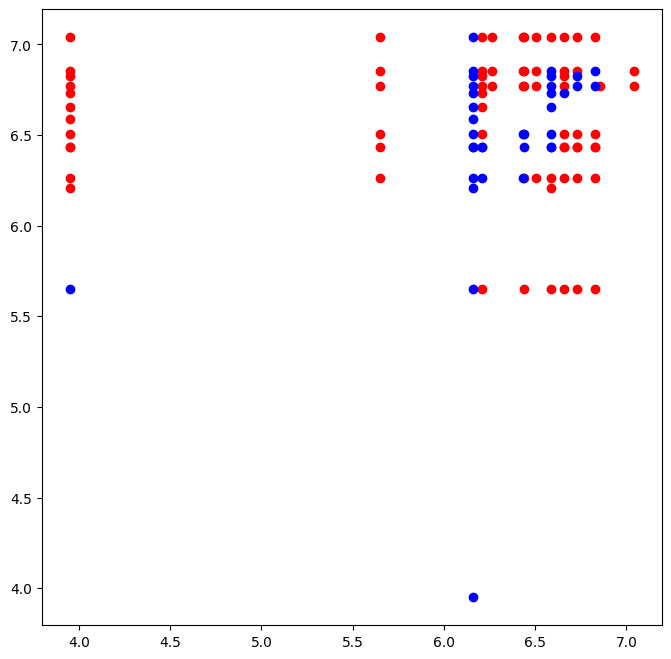

In [ ]:
list_of_res = []
for i in combinations(list_of_domains, 2):
  dict = {}
  dict['g1'] = i[0]
  dict['g2'] = i[1]
  wdf = dataset_with_domains[[i[0], i[1], 'Rating Average']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]

  dict['va'] = var_analise(wdf, wdf1, wdf2, 'Rating Average')
  dict['g1_mean'] = wdf1['Rating Average'].mean()
  dict['g2_mean'] = wdf2['Rating Average'].mean()
  list_of_res.append(dict)

resframe3 = pd.DataFrame(list_of_res)

plt.figure(figsize = (8,8))
plt.scatter(resframe3.loc[resframe3['va'] == True, 'g1_mean'], resframe3.loc[resframe3['va'] == True, 'g2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 'g1_mean'], resframe3.loc[resframe3['va'] == False, 'g2_mean'], color = 'b')

<ipython-input-50-984e8b965908>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2


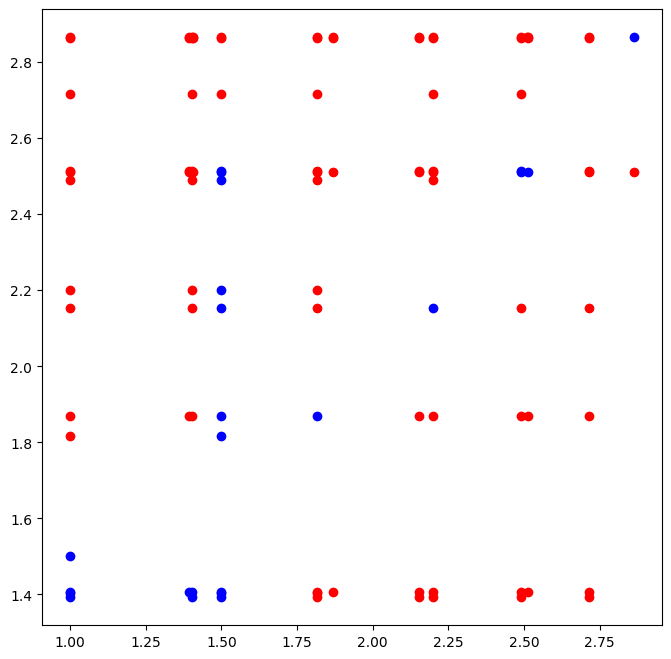

In [ ]:
list_of_res = []
for i in combinations(list_of_domains, 2):
  dict = {}
  dict['g1'] = i[0]
  dict['g2'] = i[1]
  wdf = dataset_with_domains[[i[0], i[1], 'Complexity Average']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]

  dict['va'] = var_analise(wdf, wdf1, wdf2, 'Complexity Average')
  dict['g1_mean'] = wdf1['Complexity Average'].mean()
  dict['g2_mean'] = wdf2['Complexity Average'].mean()
  list_of_res.append(dict)

resframe3 = pd.DataFrame(list_of_res)

plt.figure(figsize = (8,8))
plt.scatter(resframe3.loc[resframe3['va'] == True, 'g1_mean'], resframe3.loc[resframe3['va'] == True, 'g2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 'g1_mean'], resframe3.loc[resframe3['va'] == False, 'g2_mean'], color = 'b')

<ipython-input-50-984e8b965908>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2


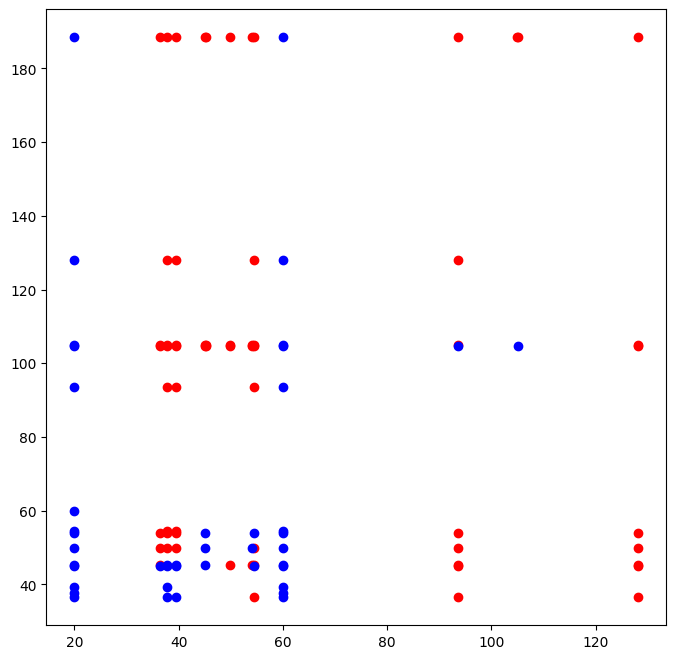

In [ ]:
list_of_res = []
for i in combinations(list_of_domains, 2):
  dict = {}
  dict['g1'] = i[0]
  dict['g2'] = i[1]
  wdf = dataset_with_domains[[i[0], i[1], 'Play Time']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]

  dict['va'] = var_analise(wdf, wdf1, wdf2, 'Play Time')
  dict['g1_mean'] = wdf1['Play Time'].mean()
  dict['g2_mean'] = wdf2['Play Time'].mean()
  list_of_res.append(dict)

resframe3 = pd.DataFrame(list_of_res)

plt.figure(figsize = (8,8))
plt.scatter(resframe3.loc[resframe3['va'] == True, 'g1_mean'], resframe3.loc[resframe3['va'] == True, 'g2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 'g1_mean'], resframe3.loc[resframe3['va'] == False, 'g2_mean'], color = 'b')

В большинстве случае жанр влияет на рейтинг, сложность и время игры (красные точки), и в меньшестве случаев (синие точки) жанр статистически не влияет на эти параметры.

# **Выводы**
Средний рейтинг игр распределен нормально и смещен в сторону более высоких оценок. Средняя сложность игр также распределена нормально, но смещена в сторону низкой сложности.



Сложность и время игры влияют на её среднюю оценку: чем выше сложность и чем длиннее игра, тем больший рейтинг она имеет.

Более сложные игры оцениваются большим числом пользователей, чем простые. Однако, чем больше игроков участвуют в игре, тем меньшую оценку она получает.

Жанр игры влияет на ее средний рейтинг, среднюю сложность, а также продолжительность.